<a href="https://colab.research.google.com/github/riyabasu06/Logistic-Regression-Project/blob/main/Covid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Dataset

In [61]:
dataset = pd.read_csv('Covid_Data_new.csv')
X = dataset.iloc[:, :-1].values #independent features/variable
y = dataset.iloc[:, -1].values #dependent variable

## Missing values(impute)

In [62]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:, 0:1])
X[:, 0:1] = imputer.transform(X[:, 0:1])

imputer.fit(X[:, 4:5])
X[:, 4:5] = imputer.transform(X[:, 4:5])

## Encoding columns

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

le = LabelEncoder()
y = np.array(le.fit_transform(y))

In [69]:
X

array([[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 10.0, 97.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 12.0, 97.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 15.0, 94.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 10.0, 97.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 13.0, 94.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 12.0, 97.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 13.0, 93.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 15.0, 92.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 18.0, 66.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 19.0, 92.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 20.0, 93.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 17.0, 93.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 16.0, 92.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 18.0, 93.0],
       [0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 20.0, 92.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 25.0, 93.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 24.0, 92.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 26.0,

## Splitting into Train-Test Sets

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:, 6:7] = sc.fit_transform(X_train[:, 6:7])
X_test[:, 6:7] = sc.transform(X_test[:, 6:7])

X_train[:, 3:4] = sc.fit_transform(X_train[:, 3:4])
X_test[:, 3:4] = sc.transform(X_test[:, 3:4])

## Creating Logistic Regression ML Model to classify the data(Train the Model on Training dataset)

In [68]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, max_iter=300)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=300, random_state=0)

## Make predictions

In [85]:
# Define the new input data in a 2D array format
test_pred = [[10, 'Normal', 'no', 'no', 97]]

# Step 1: Encode categorical values using the same ColumnTransformer as in training
test_pred_transformed = ct.transform(test_pred)

# Step 2: Scale the numerical features (last two columns in test_pred_transformed)
test_pred_transformed[:, -2] = sc.transform(test_pred_transformed[:, -2].reshape(-1, 1)).flatten()  # 'age'
test_pred_transformed[:, -1] = sc.transform(test_pred_transformed[:, -1].reshape(-1, 1)).flatten()  # 'Blood O2 Level'

# Step 3: Make the prediction
predicted_class = classifier.predict(test_pred_transformed)

# Decode the prediction to get the original label (e.g., 'Yes' or 'No')
predicted_label = le.inverse_transform(predicted_class)

# Output the prediction
print(f"Predicted Hospitalization Need: {predicted_label[0]}")


Predicted Hospitalization Need: No


## Predicting the Model on Test Set

In [75]:
y_pred = classifier.predict(X_test)

In [86]:
results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
results['Actual'] = le.inverse_transform(results['Actual'])
results['Predicted'] = le.inverse_transform(results['Predicted'])
print(results)

   Actual Predicted
0      No        No
1      No        No
2     Yes       Yes
3      No        No
4      No        No
5     Yes       Yes
6      No        No
7     Yes       Yes
8      No        No
9     Yes       Yes
10    Yes       Yes
11     No        No
12    Yes       Yes
13    Yes       Yes


## Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7 0]
 [0 7]]


1.0

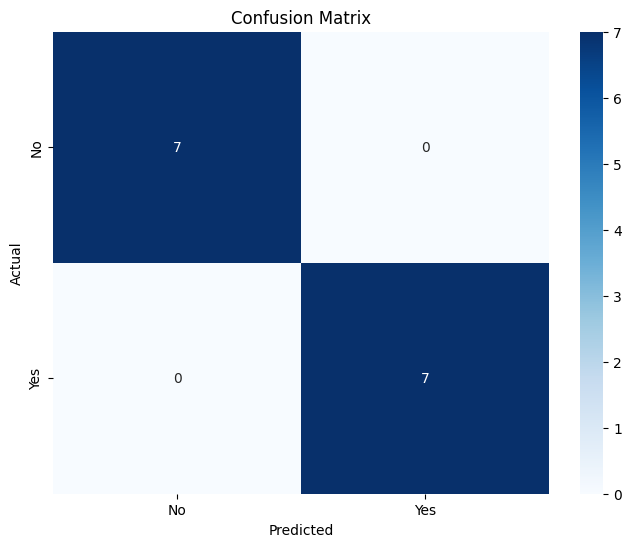

In [88]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualizing Test Set results

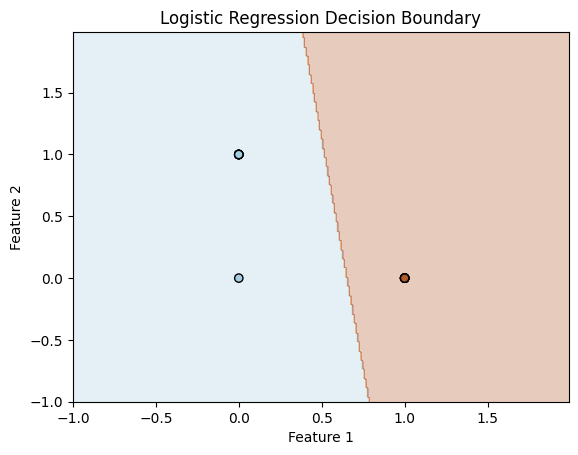

In [89]:
# Select only two features for X_train and X_test if necessary
# Assuming X_train_2D and X_test_2D are 2D versions of X_train and X_test with only two features
X_train_2D, X_test_2D = X_train[:, :2], X_test[:, :2]

# Train the classifier on these two features
classifier_2D = LogisticRegression(random_state=0)
classifier_2D.fit(X_train_2D, y_train)

# Visualize the decision boundary
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = classifier_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Paired')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, cmap='Paired', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()
